# **Week 2: Colab Experiment**

# I. Introduction
In this exercise, we load the Youtube statistics and try to predict the number of subscribers.

# II. Methods












In [92]:
# import the packges
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
# from collections import Counter
# from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

In [93]:
# load the csv file
# replace the path with your own
df = pd.read_csv("../data/Global_YouTube_Statistics_cleaned.csv")
display(df)

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,IN,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,US,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,US,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,US,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,IN,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,Music,99,US,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,BR,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,IN,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,Gaming,39,SE,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [94]:
# Use one-hot encoding to convert the categorical variables to numerical variables
######################## TODO #####################################

variables = df.columns[1:]  # ignore primary key: Youtubers
numerical_variables = df._get_numeric_data().columns
categorical_variables = list(set(variables) - set(numerical_variables))

# # One-hot encoding using pandas.get_dummies
"""
for categorical_variable in categorical_variables:
    df = df.join(pd.get_dummies(df[categorical_variable]))
    df.drop(categorical_variable, axis=1, inplace=True)
"""

# # One-hot encoding using sklearn.preprocessing.OneHotEncoder
"""
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_variables])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
df = pd.concat([df.drop(categorical_variables, axis=1), encoded_df], axis=1)
"""

for categorical_variable in categorical_variables:
    for categorcal_key in set(df[categorical_variable]):
        df[f'{categorical_variable}_{categorcal_key}'] = (
            df[categorical_variable] == categorcal_key).astype(int)
    df.drop(categorical_variable, axis=1, inplace=True)

#####################################################################

In [95]:
# Get correlation matrix and removed features
corr_threshold = 0.08
df_corr = df.loc[:, df.columns != 'Youtuber']
corr_matrix = df_corr.corr().abs()
corr_matrix_y = corr_matrix['subscribers'].sort_values(ascending=False)
filtered_corr_matrix_y = corr_matrix_y[corr_matrix_y < corr_threshold]
removed_features = filtered_corr_matrix_y.index.to_list()

# print(corr_matrix_y.head(15))

# Draw distribution of corr_matrix_y
"""
plt.figure(figsize=(10, 6))
sns.histplot(corr_matrix_y, bins=10, kde=True)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation between Features and Subscribers')
plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nsns.histplot(corr_matrix_y, bins=10, kde=True)\nplt.xlabel('Correlation')\nplt.ylabel('Frequency')\nplt.title('Distribution of Correlation between Features and Subscribers')\nplt.show()\n"

In [96]:
# Define the dependent and independent variables.
Y = df[['subscribers']].values
# X = df.loc[:, np.isin(df.columns, ['subscribers', 'Youtuber']) == False].values
X = df.loc[:, np.isin(df.columns, ['subscribers', 'Youtuber'] + removed_features) == False].values

In [97]:
# Create CV folds
######################## TODO #####################################
num_folds = 5
k_folds = dict()

kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    k_folds[i] = {'train': train_index, 'test': test_index}

#####################################################################

In [98]:
# Train models and apply them to the test set

Y_est_linear = np.full([len(Y), 1], np.nan)
Y_est_ridge = np.full([len(Y), 1], np.nan)

# training steps
for fold_id in range(num_folds):
    ######################## TODO #####################################
    # X_train. Y_train for training
    # X_test, Y_test for predict
    X_train, Y_train = X[k_folds[fold_id]['train']], Y[k_folds[fold_id]
                                                       ['train']]
    X_test, Y_test = X[k_folds[fold_id]['test']], Y[k_folds[fold_id]['test']]

    #####################################################################

    # Linear regression
    ######################## TODO #####################################

    # linear regression without using pipeline
    """
    linear = LinearRegression()
    linear.fit(X_train, Y_train)
    Y_est_linear[k_folds[fold_id]['test']] = linear.predict(X_test)
    """
    
    pipe_linear = Pipeline([('linear', LinearRegression())])
    pipe_linear.fit(X_train, Y_train)
    Y_est_linear[k_folds[fold_id]['test']] = pipe_linear.predict(X_test)

    #####################################################################

    # Ridge regression
    ######################## TODO #####################################

    # using grid search to find the best alpha on ridge regression
    pipe_ridge = Pipeline([('ridge', Ridge(max_iter=100))])
    param_grid = {
        'ridge__alpha': np.logspace(0, 5, 100),
        'ridge__solver':
        ['lsqr', 'sparse_cg', 'saga']
    }  # alpha from 0 to 100000
    grid = GridSearchCV(pipe_ridge,
                        param_grid,
                        scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, Y_train)
    Y_est_ridge[k_folds[fold_id]['test']] = grid.predict(X_test)

    # print(f'Best alpha: {grid.best_params_} at fold {fold_id}')

    #####################################################################

df['Estimated_subscribers_linear'] = Y_est_linear
df['Estimated_subscribers_ridge'] = Y_est_ridge

c:\Users\codeamon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\codeamon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\codeamon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\codeamon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## III. Results

Post hoc analysis to examine the correlation and RMSE between the true number of subscribers and the predicted number of subscribers.

In [99]:
def plot_function(df, x_variable, y_variable):
    plt.figure(figsize=(5, 5), dpi=150)
    sns.scatterplot(data=df, x=x_variable, y=y_variable)
    corr = round(pearsonr(df[x_variable], df[y_variable])[0], 3)
    # # squared is deprecated since version 1.4
    # rmse = round(
    #     mean_squared_error(df[x_variable], df[y_variable], squared=False), 3)
    rmse = round(root_mean_squared_error(df[x_variable], df[y_variable]), 3)
    plt.title(f"corr = {corr} \n RMSE={rmse}")
    plt.show()

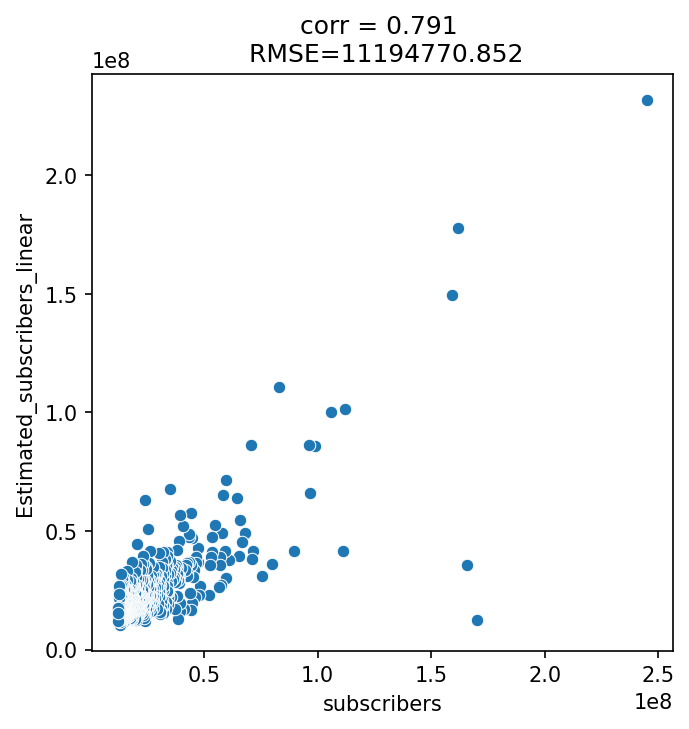

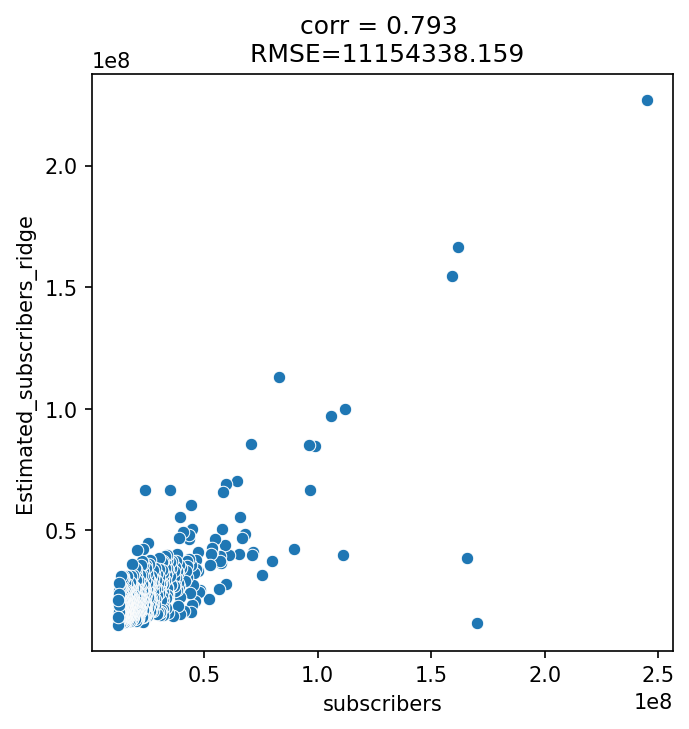

In [100]:
plot_function(df, "subscribers", "Estimated_subscribers_linear")
plot_function(df, "subscribers", "Estimated_subscribers_ridge")

# IV. Conclusion and Discussion



**1. Using one hot encoding to preprocess the data.**
Since the primary key "Youtuber" is a categorical variable that doesn't require to be converted, we will omit it from the one hot encoding process. I have identified three different approaches for implementing one-hot encoding, which I will outline below.

1. [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

2. [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

3. handcraft

    ```{python, tidy=FALSE, eval=FALSE, highlight=FALSE }
    For each categorical variable in the dataframe:
        For each unique value (key) in the categorical variable:
            Create a new column named after the key
            Set the value in the new column to 1 if the cell value is equal to the key
            Set the value in the new column to 0 otherwise
        Remove the original categorical variable column from the dataframe
    ```

**2. Feature selection.**

Due to the presence of redundant features in the data, utilizing a correlation matrix for feature selection helps to detect and eliminate these redundant features, which can lead to better model performance and interpretability. Furthermore, by minimizing the number of features, we can decrease computational costs and accelerate the training process. By illustrating how the correlation between the target variable and all other variables is distributed,  we can identify a gap at 0.8. This helps us determine which variables should be excluded in the next steps.

**3. Separate training and testing set with Kfold.**

Processing KFold data according to the official API documentation, then store them in a dictionary for further process.

**4. Complete the training step in each fold.**

In each fold, the training and testing variables will be determined using indexes from the Kfold dictionary and will be retrieved from the X variable.

**5. Implement linear regression && ridge regression.**

Both linear regression and ridge regression will be handled using `sklearn.pipeline.Pipeline`, as it enables the combination of multiple processing steps and concludes with a final predictor for modeling. Additionally, GridSearchCV can be used in conjunction with a pipeline to grid search parameters. We experimented with various preprocessing techniques, including StandardScaler, MinMaxScaler, MaxAbsScaler, and RobustScaler. Despite these efforts, none of these methods improved the model's performance. Therefore, we tune the model by grid search parameters of ridge regression.

**6. Description of the methodology.**

As described above, we implement the processes followed by the instructions from TA to create the regression model.

**7. Conclusions and discussions.**

From the result diagrams, the correlation values of 0.791 and 0.793 indicate a strong positive linear relationship between the actual number of subscribers and the estimated values from both linear and ridge regression models. Besides, the RSME values of 11194770.852 and 11154278.636 indicate the ridge regression model has a better fit to the data due to a slightly lower RMSE. Both linear regression and ridge regression show strong performance and robustness, but the ridge regression model may be preferred due to its slightly lower RSME, indicating better predictive accuracy. As a result, YouTubers can identify key variables for their business decisions using both models and enhance their accuracy by continually adding more data in the future.